# Setup

In [5]:
%pip install pyshark
%pip install nest_asyncio
%pip install pandas

import sys
sys.path.append('..')

from src.preprocessors.pcap_preprocessor import PcapPreprocessor
import nest_asyncio
nest_asyncio.apply()


preprocessor = PcapPreprocessor()

base_data = preprocessor.get_all_data()
print(base_data)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
                           _id  \
0     672f97919597e73b58b2a7ff   
1     672f97919597e73b58b2a800   
2     672f97919597e73b58b2a801   
3     672f97919597e73b58b2a802   
4     672f97919597e73b58b2a803   
...                        ...   
8802  672f97929597e73b58b2ca61   
8803  672f97929597e73b58b2ca62   
8804  672f97929597e73b58b2ca63   
8805  672f97929597e73b58b2ca64   
8806  672f97929597e73b58b2ca65   

                                                dataset    label  \
0     data/2024-10-23-Redline-Stealer-infection-traf...  unknown   
1     data/2024-10-23-Redline-Stealer-infection-traf...  unknown   
2     data/2024-10-23-Redline-Stealer-infection-traf...  unknown   
3     data/2024-10-23-Redline-Stealer-infection-traf...  unknown   
4     data/2024-10-23-Redline-Stealer-infection-traf.

# Visualization

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from src.visualization.visualization import Visualization
from IPython.display import display, HTML

visualization = Visualization()

# Check available columns in base_data
print("Columns in base_data:", base_data.columns.tolist())

Columns in base_data: ['_id', 'dataset', 'label', 'eth.dst', 'eth.dst_resolved', 'eth.dst_oui', 'eth.dst_oui_resolved', 'eth.dst_lg', 'eth.dst_ig', 'eth.addr', 'eth.addr_resolved', 'eth.addr_oui', 'eth.addr_oui_resolved', 'eth.lg', 'eth.ig', 'eth.src', 'eth.src_resolved', 'eth.src_oui', 'eth.src_oui_resolved', 'eth.src_lg', 'eth.src_ig', 'eth.type', 'eth.stream', 'ip.version', 'ip.hdr_len', 'ip.dsfield', 'ip.dsfield_dscp', 'ip.dsfield_ecn', 'ip.len', 'ip.id', 'ip.flags', 'ip.flags_rb', 'ip.flags_df', 'ip.flags_mf', 'ip.frag_offset', 'ip.ttl', 'ip.proto', 'ip.checksum', 'ip.checksum_status', 'ip.src', 'ip.addr', 'ip.src_host', 'ip.host', 'ip.dst', 'ip.dst_host', 'ip.stream', 'tcp.srcport', 'tcp.dstport', 'tcp.port', 'tcp.stream', 'tcp.completeness', 'tcp.completeness_rst', 'tcp.completeness_fin', 'tcp.completeness_data', 'tcp.completeness_ack', 'tcp.completeness_syn_ack', 'tcp.completeness_syn', 'tcp.completeness_str', 'tcp.len', 'tcp.seq', 'tcp.seq_raw', 'tcp.nxtseq', 'tcp.ack', 'tcp.a

In [7]:
print(base_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Columns: 250 entries, _id to tcp.connection_rst
dtypes: bool(9), float64(88), int64(14), object(139)
memory usage: 16.3+ MB
None


In [9]:
print("Column Information:")
display(HTML(base_data.dtypes.to_frame().to_html(header=["Data Type"], index=True)))

Column Information:


,0
_id,object
dataset,object
label,object
eth.dst,object
eth.dst_resolved,object
eth.dst_oui,int64
eth.dst_oui_resolved,object
eth.dst_lg,bool
eth.dst_ig,bool
eth.addr,object


In [10]:
print("\nFirst 5 lines of the dataset as a table:")
display(HTML(base_data.head(5).to_html()))
base_data['eth.dst_lg'].nunique()


First 5 lines of the dataset as a table:


,_id,dataset,label,eth.dst,eth.dst_resolved,eth.dst_oui,eth.dst_oui_resolved,eth.dst_lg,eth.dst_ig,eth.addr,eth.addr_resolved,eth.addr_oui,eth.addr_oui_resolved,eth.lg,eth.ig,eth.src,eth.src_resolved,eth.src_oui,eth.src_oui_resolved,eth.src_lg,eth.src_ig,eth.type,eth.stream,ip.version,ip.hdr_len,ip.dsfield,ip.dsfield_dscp,ip.dsfield_ecn,ip.len,ip.id,ip.flags,ip.flags_rb,ip.flags_df,ip.flags_mf,ip.frag_offset,ip.ttl,ip.proto,ip.checksum,ip.checksum_status,ip.src,ip.addr,ip.src_host,ip.host,ip.dst,ip.dst_host,ip.stream,tcp.srcport,tcp.dstport,tcp.port,tcp.stream,tcp.completeness,tcp.completeness_rst,tcp.completeness_fin,tcp.completeness_data,tcp.completeness_ack,tcp.completeness_syn_ack,tcp.completeness_syn,tcp.completeness_str,tcp.len,tcp.seq,tcp.seq_raw,tcp.nxtseq,tcp.ack,tcp.ack_raw,tcp.hdr_len,tcp.flags,tcp.flags_res,tcp.flags_ae,tcp.flags_cwr,tcp.flags_ece,tcp.flags_urg,tcp.flags_ack,tcp.flags_push,tcp.flags_reset,tcp.flags_syn,tcp._ws_expert,tcp.connection_syn,tcp._ws_expert_message,tcp._ws_expert_severity,tcp._ws_expert_group,tcp.flags_fin,tcp.flags_str,tcp.window_size_value,tcp.window_size,tcp.checksum,tcp.checksum_status,tcp.urgent_pointer,tcp.options,tcp.options_mss,tcp.option_kind,tcp.option_len,tcp.options_mss_val,tcp.options_nop,tcp.options_wscale,tcp.options_wscale_shift,tcp.options_wscale_multiplier,tcp.options_sack_perm,tcp.,tcp.time_relative,tcp.time_delta,tcp.connection_synack,tcp.options_sack_perm_absent,tcp.analysis,tcp.analysis_acks_frame,tcp.analysis_ack_rtt,tcp.window_size_scalefactor,tcp.analysis_initial_rtt,tcp.analysis_bytes_in_flight,tcp.analysis_push_bytes_sent,tcp.payload,tcp.segment_data,http.,http.response_version,http.response_code,http.response_code_desc,http.response_phrase,http.response,DATA.tcp_segments,DATA.tcp_segment,DATA.tcp_segment_count,DATA.tcp_reassembled_length,DATA.tcp_reassembled_data,http.request_method,http.request_uri,http.request_version,http.content_type,http.request_line,http.host,http.content_length_header,http.content_length,http.accept_encoding,http.connection,http.request,http.request_full_uri,http.file_data,xml.tag,xml.attribute,xml.,http.response_line,http.server,http.date,http.request_in,http.time,xml.cdata,udp.srcport,udp.dstport,udp.port,udp.length,udp.checksum,udp.checksum_status,udp.stream,udp.stream_pnum,udp.,udp.time_relative,udp.time_delta,udp.payload,dns.id,dns.flags,dns.flags_response,dns.flags_opcode,dns.flags_truncated,dns.flags_recdesired,dns.flags_z,dns.flags_checkdisable,dns.count_queries,dns.count_answers,dns.count_auth_rr,dns.count_add_rr,dns.,dns.qry_name,dns.qry_name_len,dns.count_labels,dns.qry_type,dns.qry_class,dns.flags_authoritative,dns.flags_recavail,dns.flags_authenticated,dns.flags_rcode,dns.resp_name,dns.resp_type,dns.resp_class,dns.resp_ttl,dns.resp_len,dns.cname,dns.a,dns.response_to,dns.time,tls.record,tls.record_content_type,tls.record_version,tls.record_length,tls.handshake,tls.handshake_type,tls.handshake_length,tls.handshake_version,tls.handshake_random,tls.handshake_random_time,tls.handshake_random_bytes,tls.handshake_session_id_length,tls.handshake_cipher_suites_length,tls.handshake_ciphersuites,tls.handshake_ciphersuite,tls.handshake_comp_methods_length,tls.handshake_comp_methods,tls.handshake_comp_method,tls.handshake_extensions_length,tls.,tls.handshake_extension_type,tls.handshake_extension_len,tls.handshake_extensions_server_name_list_len,tls.handshake_extensions_server_name_type,tls.handshake_extensions_server_name_len,tls.handshake_extensions_server_name,tls.handshake_extensions_supported_groups_length,tls.handshake_extensions_supported_groups,tls.handshake_extensions_supported_group,tls.handshake_extensions_ec_point_formats_length,tls.handshake_extensions_ec_point_formats,tls.handshake_extensions_ec_point_format,tls.handshake_extensions_session_ticket,tls.handshake_extensions_reneg_info_len,tls.handshake_ja4,tls.handshake_ja4_r,tls.handshake_ja3_full,tls.handshake_ja3,tls.handshake_ja3s_full,tls.handshake_ja3s,tls.segment_data

1

In [11]:
# Function to filter columns by missing values and display the desired outputs
def filter_columns_by_missing_values(base_data, threshold=0.85):
    # Calculate the percentage of missing values for each column
    missing_percentage = base_data.isnull().mean()
    
    # Get columns with 0% missing values
    zero_missing = missing_percentage[missing_percentage == 0]
    zero_missing_list = zero_missing.index.tolist()
    
    # Get columns with missing values less than the threshold and greater than 0
    valid_columns = missing_percentage[(missing_percentage < threshold) & (missing_percentage > 0)]
    
    # Get columns with more than 85% missing values
    high_missing = missing_percentage[missing_percentage > threshold]
    high_missing_list = high_missing.index.tolist()
    
    # Create a DataFrame to display columns with less than 85% missing (excluding 0% missing)
    valid_columns_df = pd.DataFrame({
        'Column': valid_columns.index,
        'Missing Percentage': valid_columns.values * 100  # Convert to percentage
    })

    # Display the list and table
    print("Columns with 0% Missing Values:", zero_missing_list)
    print("Columns with >85% Missing Values:", high_missing_list)

    # Display the table with columns that have missing values less than 85% (excluding 0% missing)
    html_table = valid_columns_df.to_html(index=False, escape=False)
    display(HTML(f"<h3>Columns with <85% Missing Values (excluding 0%)</h3>{html_table}"))
    
    # Return the cleaned DataFrame with only valid columns
    base_data_cleaned = base_data[valid_columns.index]
    
    return base_data_cleaned

# Example usage
base_data_cleaned = filter_columns_by_missing_values(base_data, threshold=0.85)


Columns with 0% Missing Values: ['_id', 'dataset', 'label', 'eth.dst', 'eth.dst_resolved', 'eth.dst_oui', 'eth.dst_oui_resolved', 'eth.dst_lg', 'eth.dst_ig', 'eth.addr', 'eth.addr_resolved', 'eth.addr_oui', 'eth.addr_oui_resolved', 'eth.lg', 'eth.ig', 'eth.src', 'eth.src_resolved', 'eth.src_oui', 'eth.src_oui_resolved', 'eth.src_lg', 'eth.src_ig', 'eth.type', 'eth.stream', 'ip.version', 'ip.hdr_len', 'ip.dsfield', 'ip.dsfield_dscp', 'ip.dsfield_ecn', 'ip.len', 'ip.id', 'ip.flags', 'ip.flags_rb', 'ip.flags_df', 'ip.flags_mf', 'ip.frag_offset', 'ip.ttl', 'ip.proto', 'ip.checksum', 'ip.checksum_status', 'ip.src', 'ip.addr', 'ip.src_host', 'ip.host', 'ip.dst', 'ip.dst_host', 'ip.stream']
Columns with >85% Missing Values: ['tcp.connection_syn', 'tcp.options', 'tcp.options_mss', 'tcp.option_kind', 'tcp.option_len', 'tcp.options_mss_val', 'tcp.options_nop', 'tcp.options_wscale', 'tcp.options_wscale_shift', 'tcp.options_wscale_multiplier', 'tcp.options_sack_perm', 'tcp.connection_synack', 'tcp

Column,Missing Percentage
tcp.srcport,0.022709
tcp.dstport,0.022709
tcp.port,0.022709
tcp.stream,0.022709
tcp.completeness,0.022709
tcp.completeness_rst,0.022709
tcp.completeness_fin,0.022709
tcp.completeness_data,0.022709
tcp.completeness_ack,0.022709
tcp.completeness_syn_ack,0.022709


/home/kirim/Documents/University/PRI/project/tests/../src/visualization/visualization.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data.replace("", np.nan, inplace=True)
/home/kirim/Documents/University/PRI/project/tests/../src/visualization/visualization.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_data.replace("null", np.nan, inplace=True)


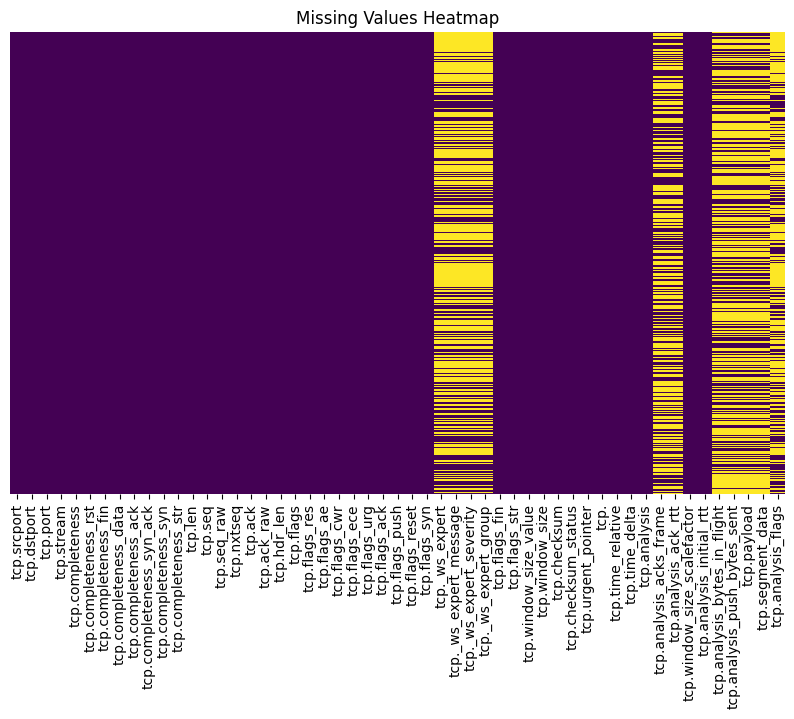

In [12]:
visualization.plot_missing_values_heatmap(base_data_cleaned)

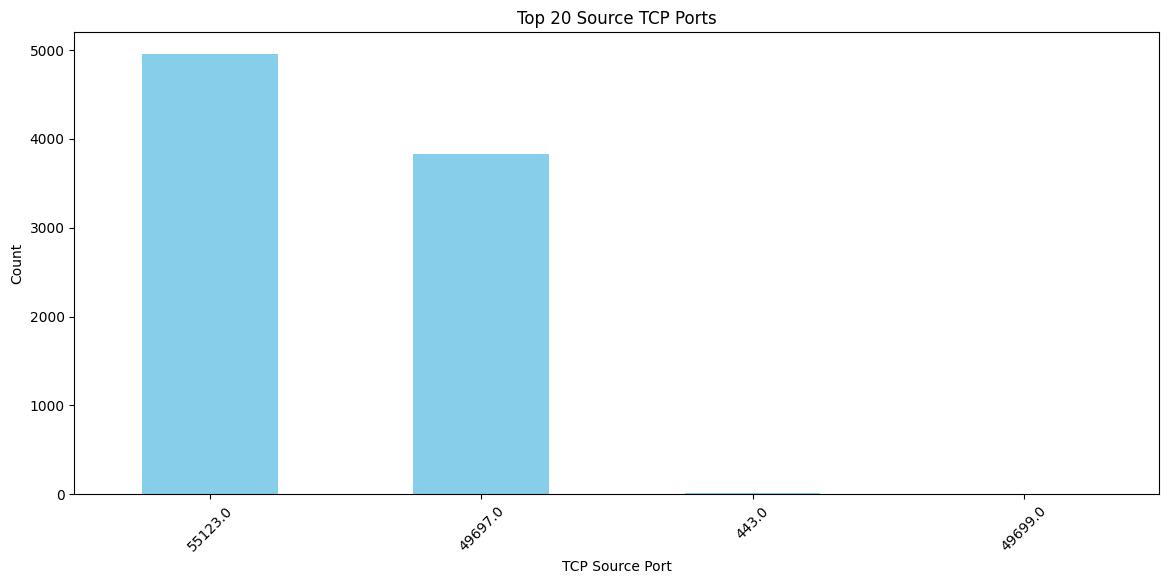

In [9]:
visualization.plot_tcp_source_ports(base_data)

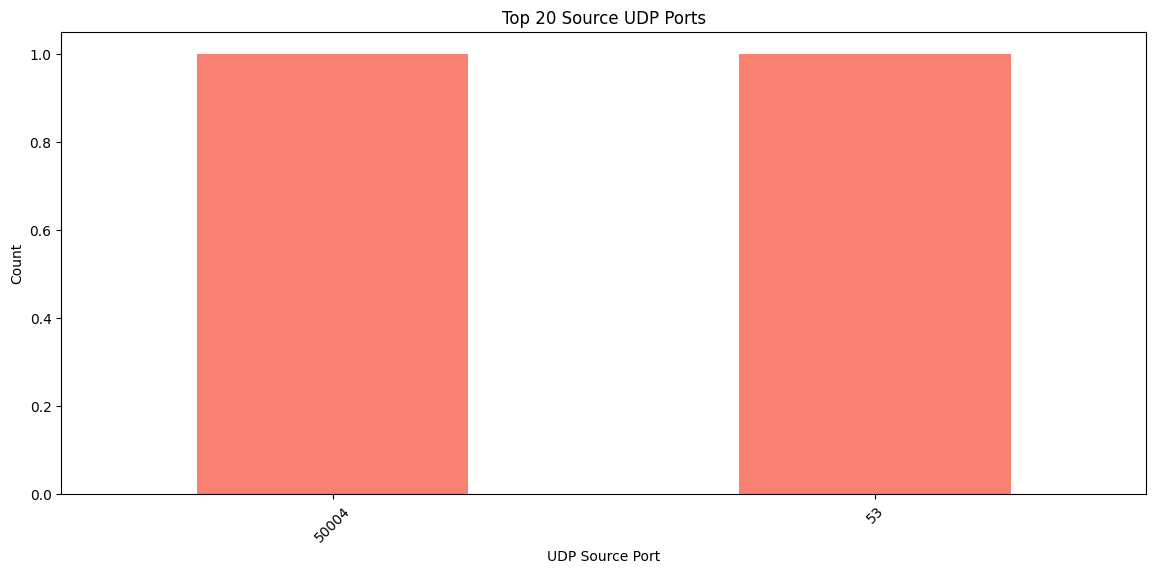

In [10]:
visualization.plot_udp_source_ports(base_data)

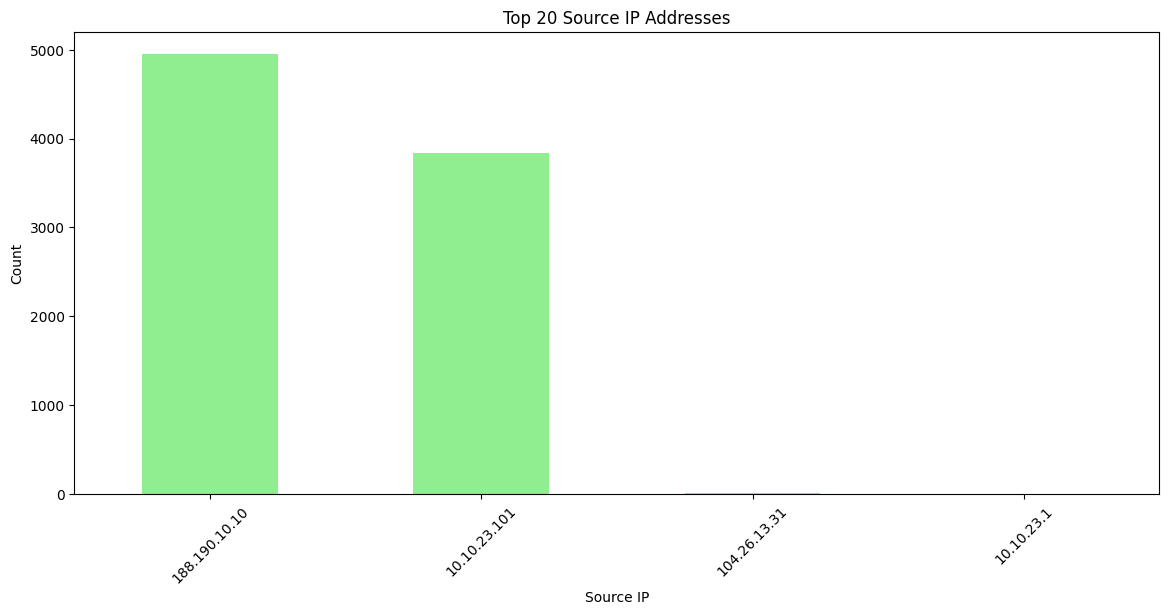

In [11]:
visualization.plot_top_ip_addresses(base_data)

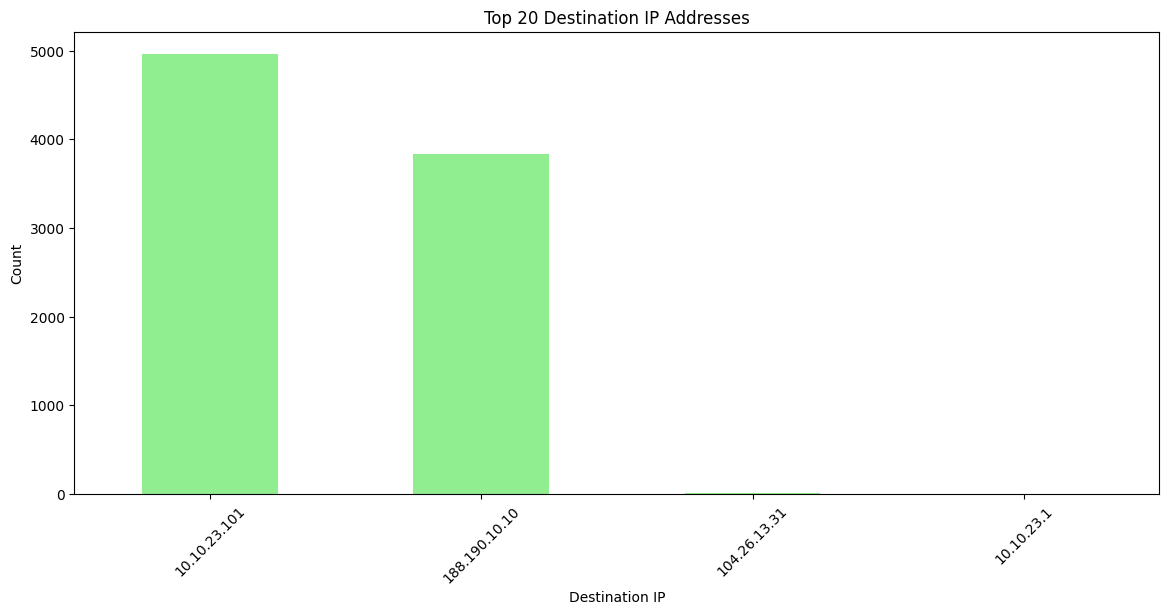

In [12]:
visualization.plot_top_ip_dest_addresses(base_data)

/home/kirim/Documents/University/PRI/project/src/visualization/visualization.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='tcp.flags_str', data=base_data, order=base_data['tcp.flags_str'].value_counts().index, palette='coolwarm')


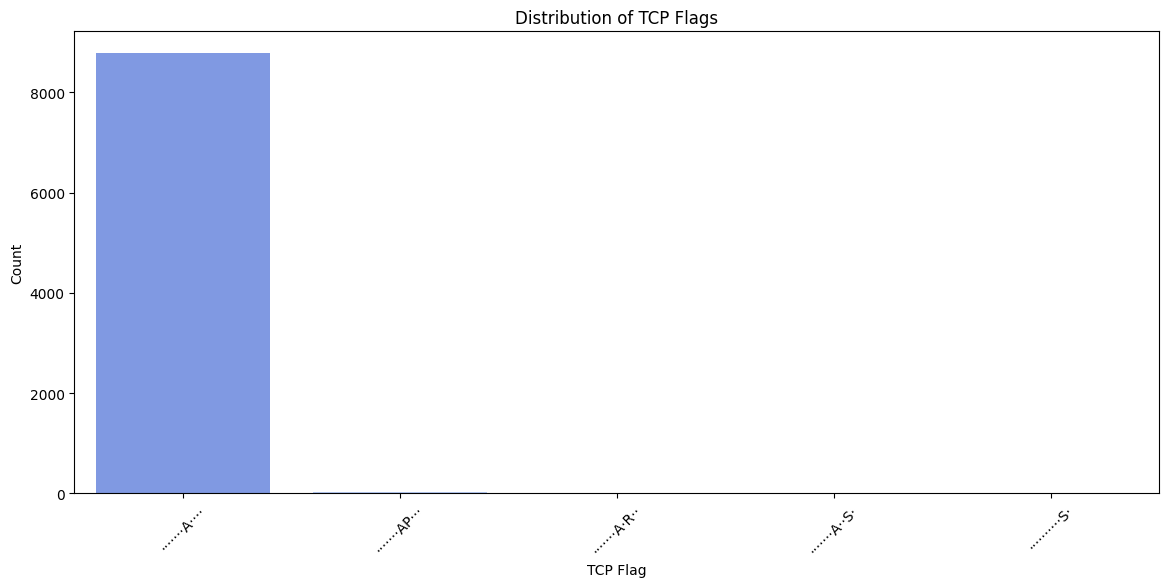

In [13]:
visualization.plot_tcp_flags_distribution(base_data)

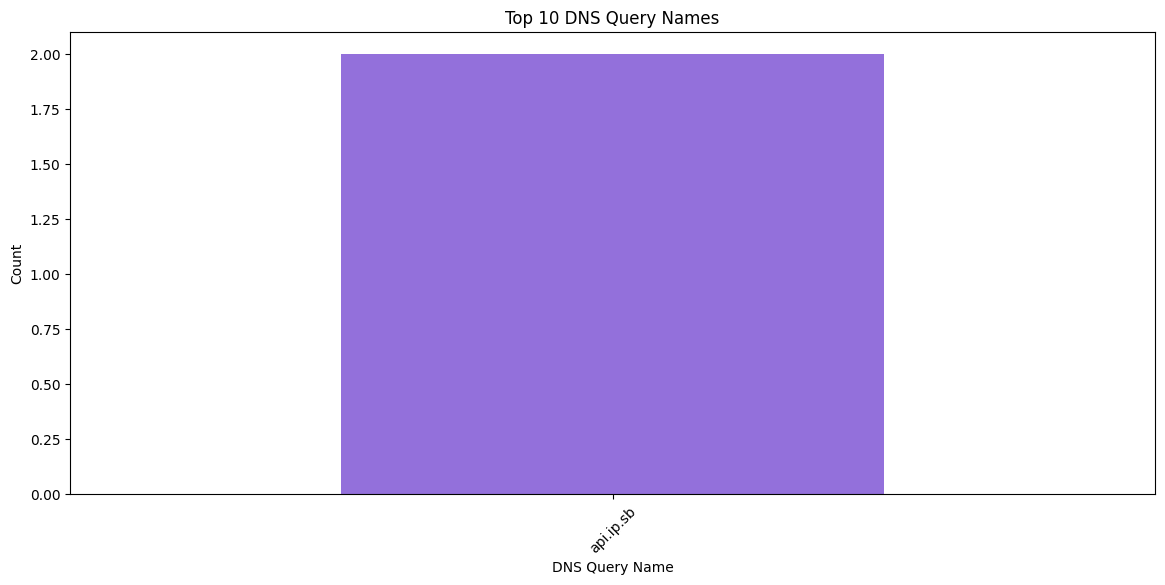

In [14]:
visualization.plot_dns_queries(base_data)

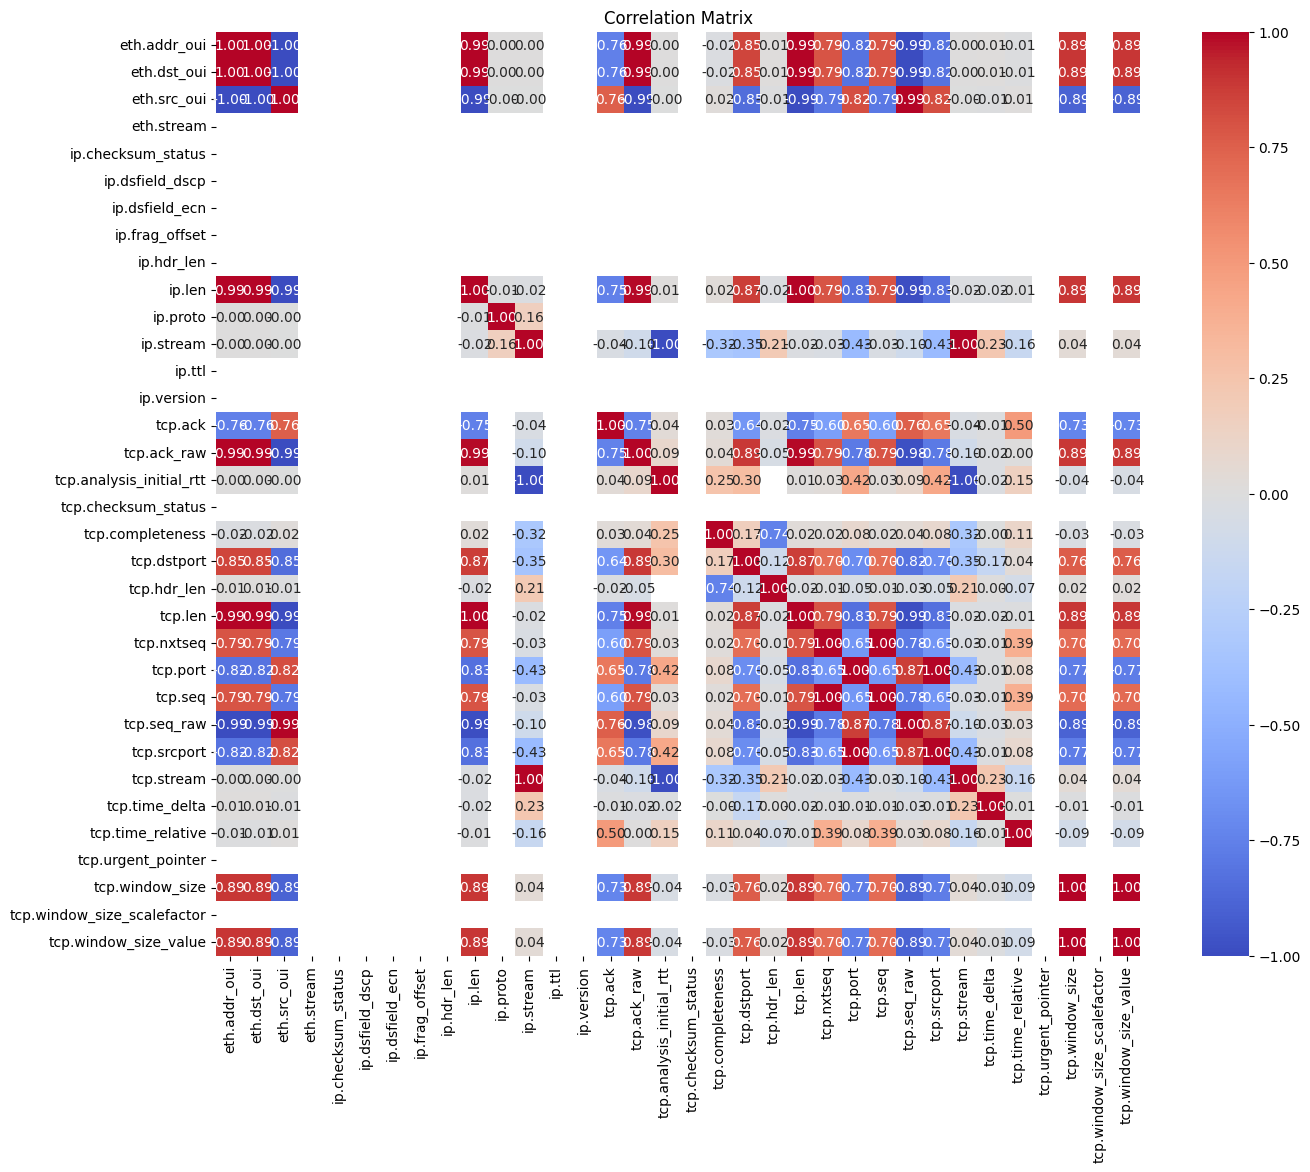

In [15]:
visualization.plot_correlation_matrix(base_data)

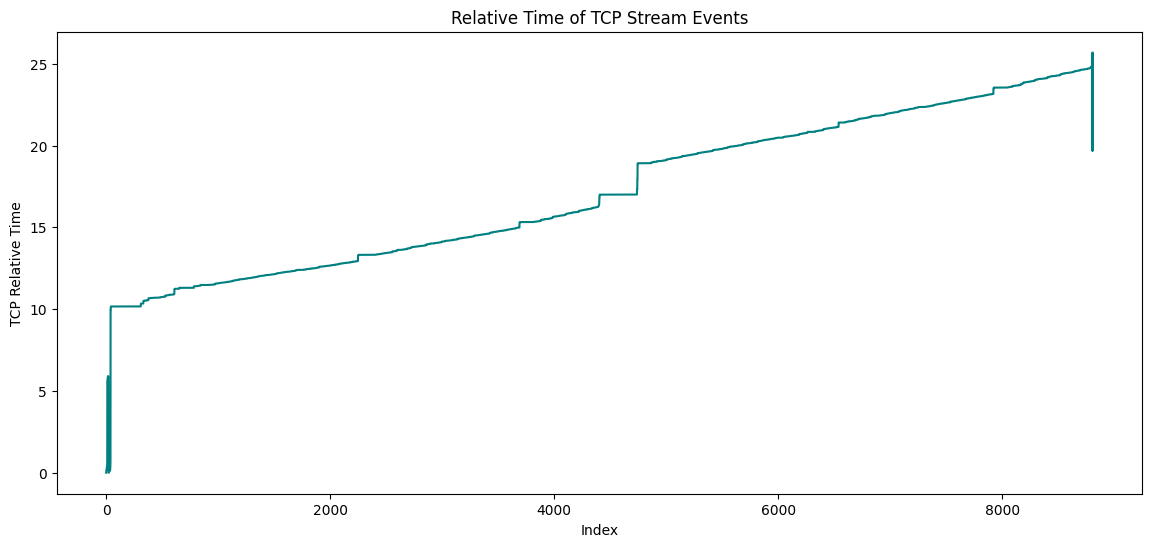

In [16]:
visualization.plot_tcp_stream_time_series(base_data)

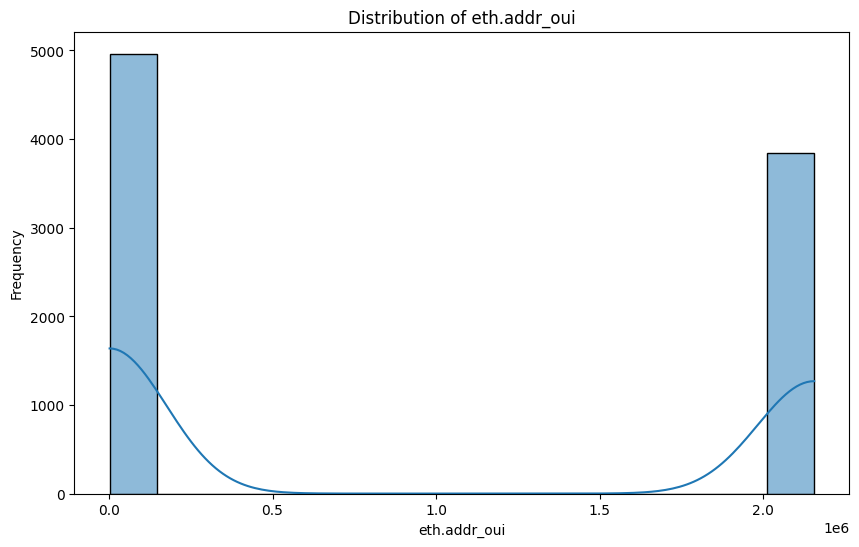

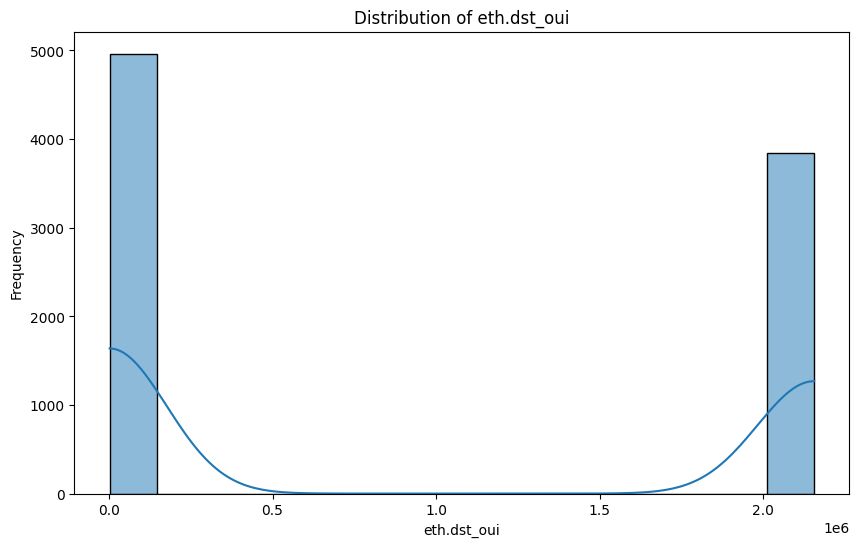

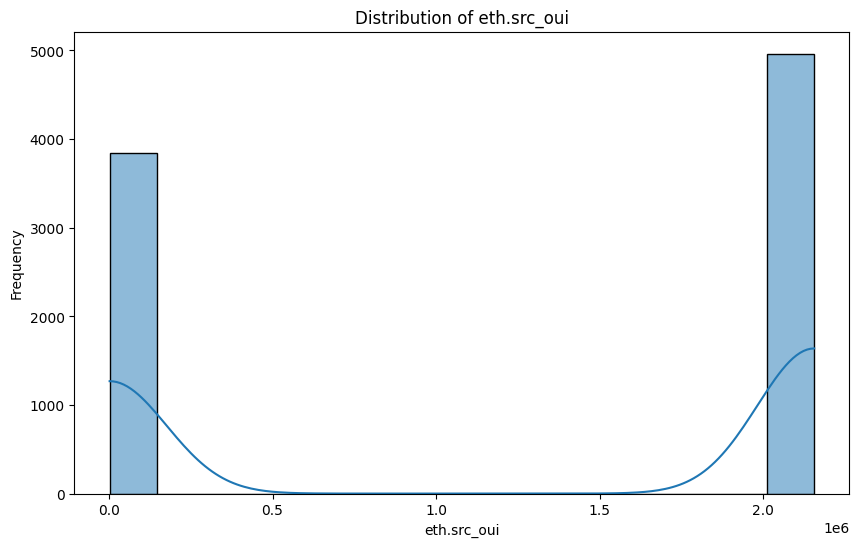

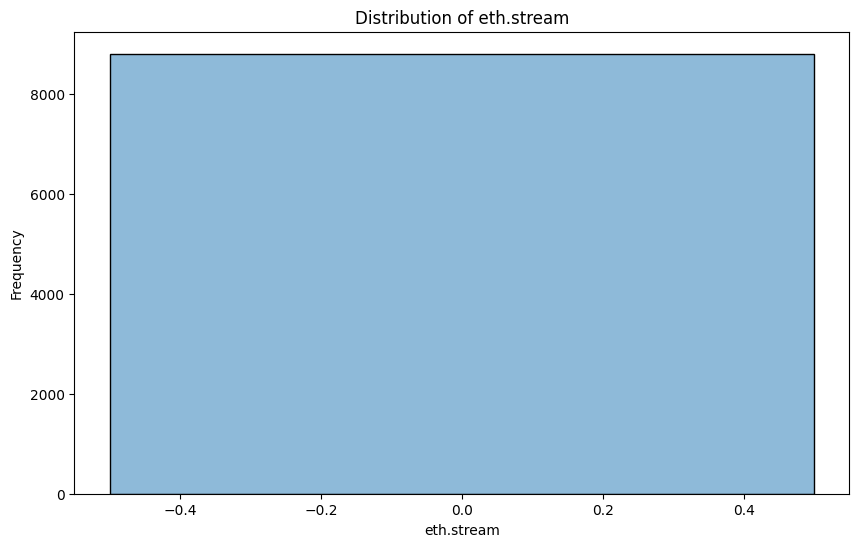

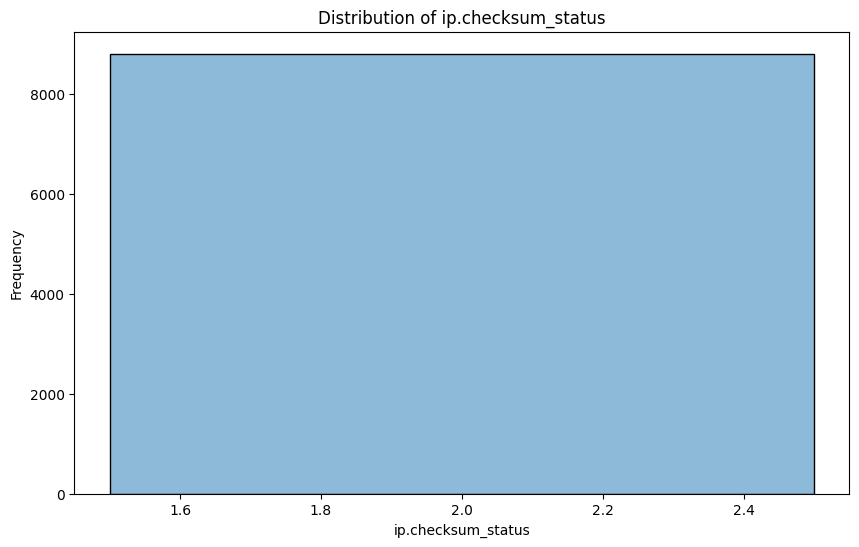

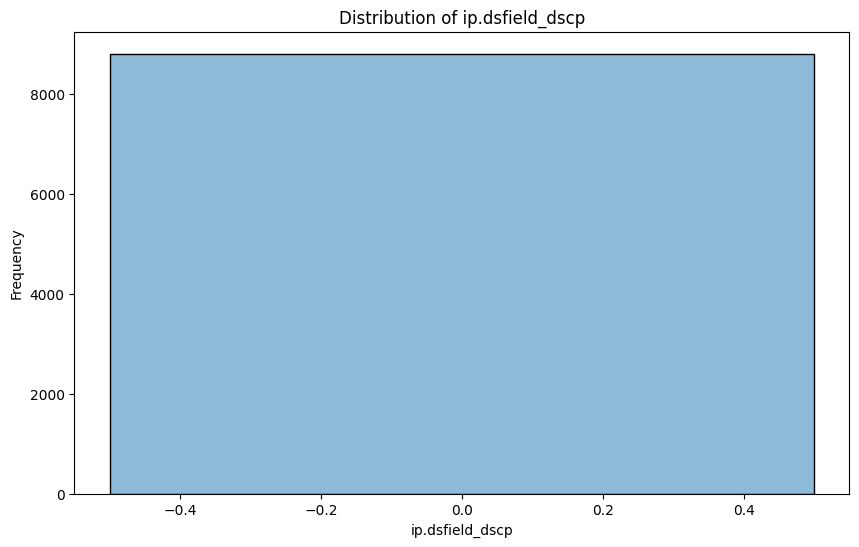

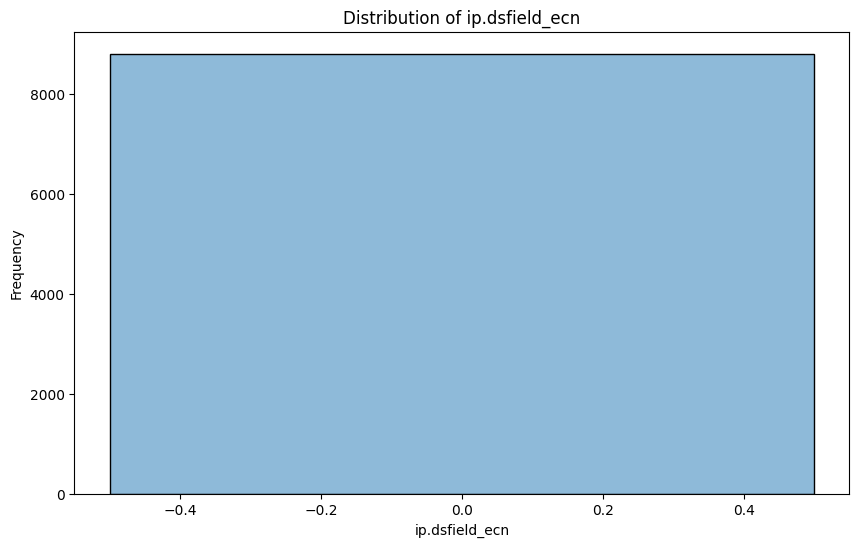

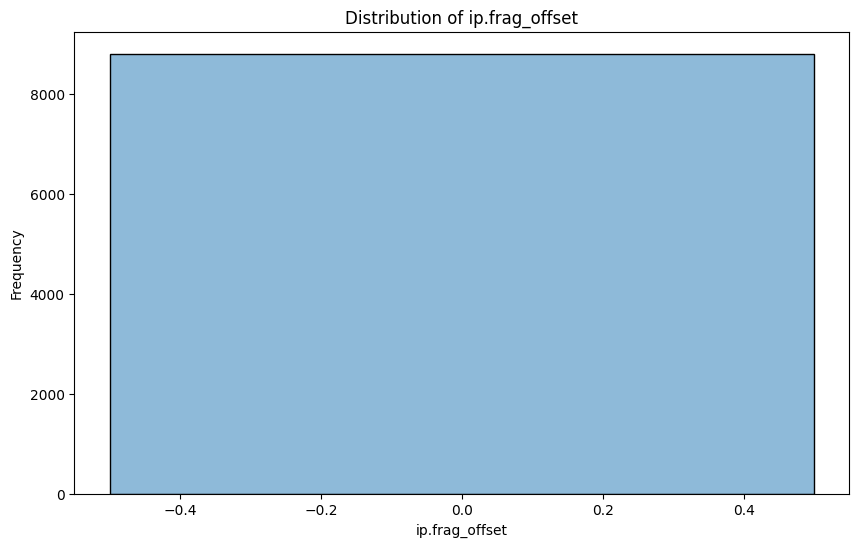

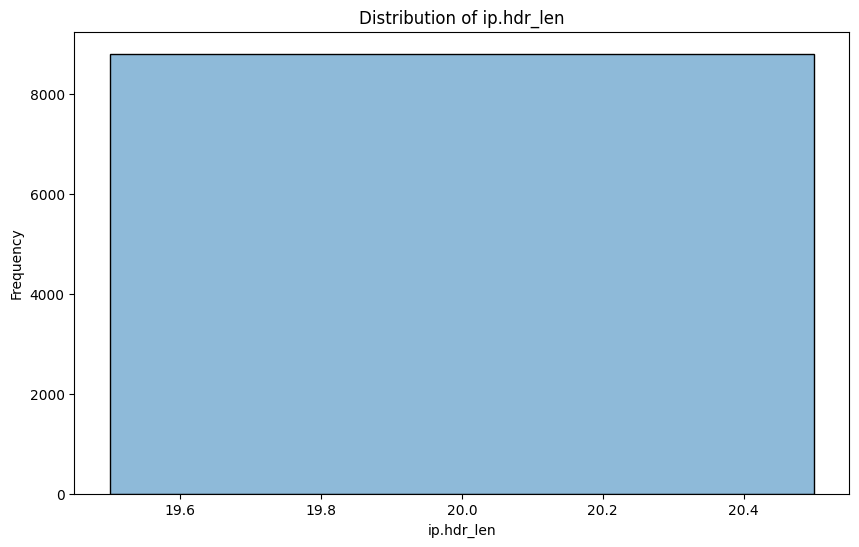

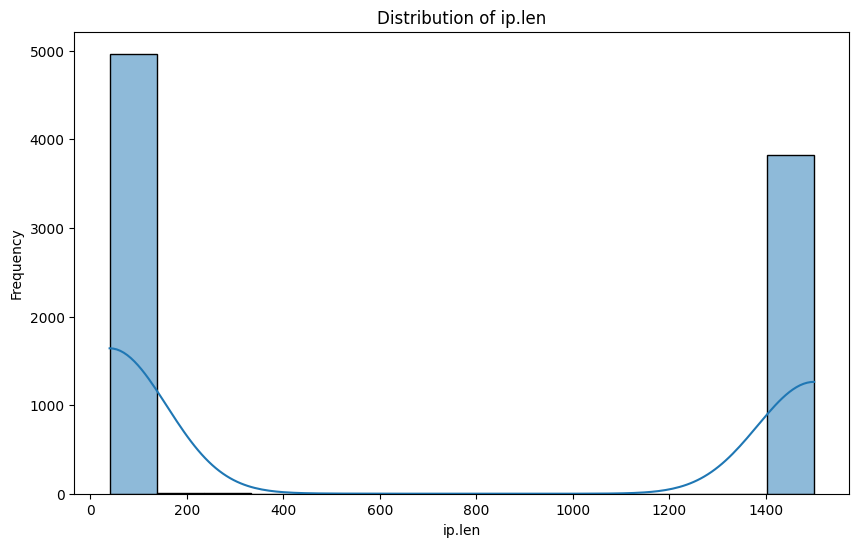

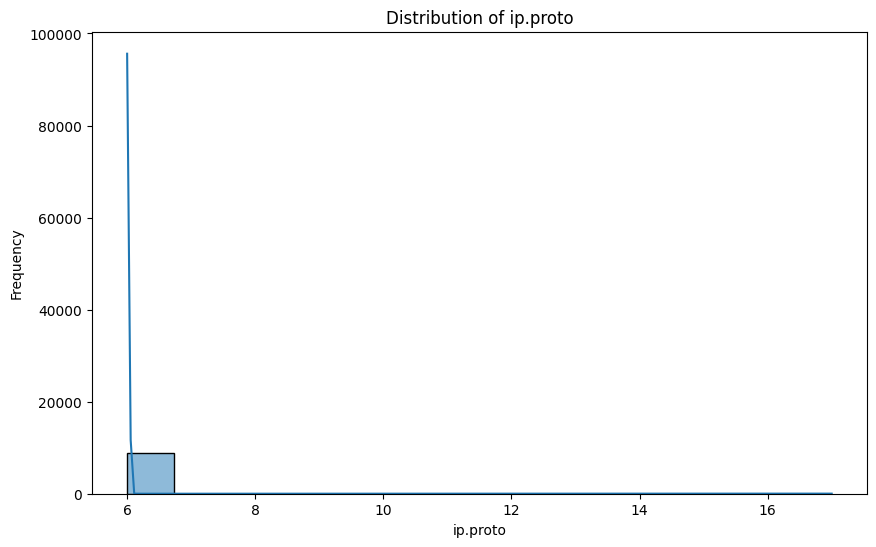

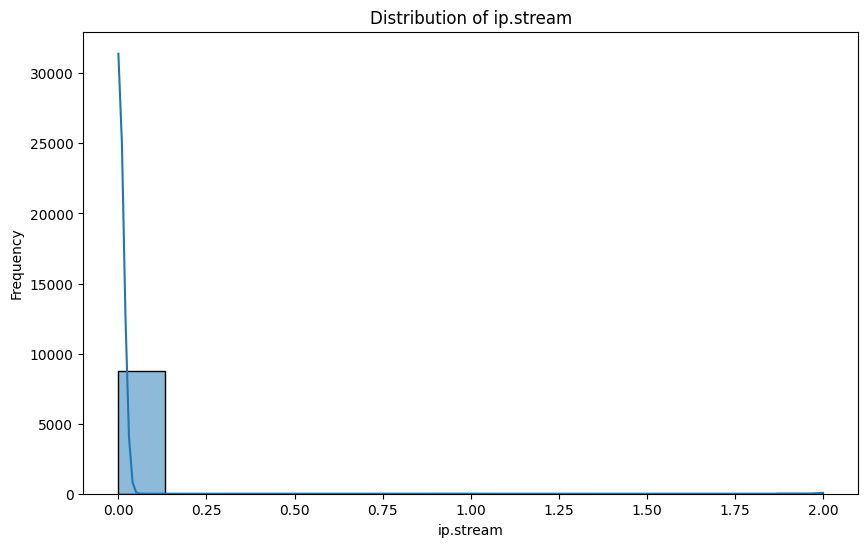

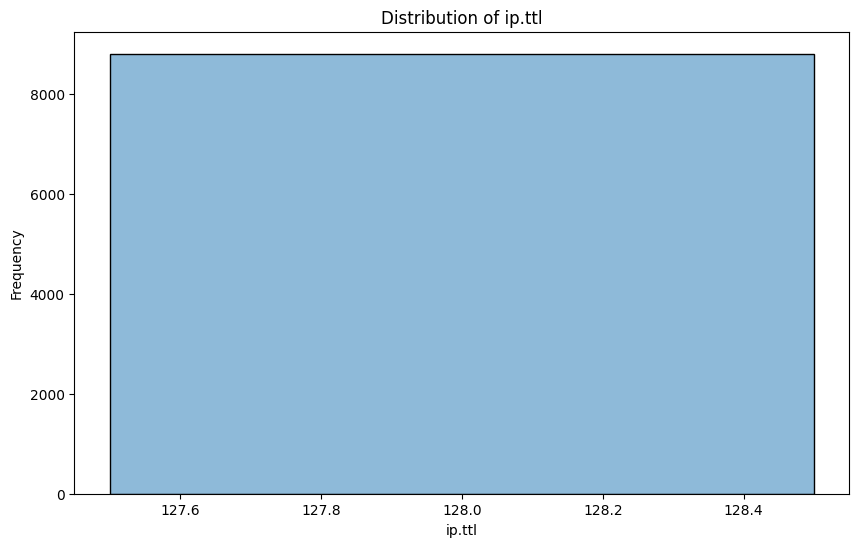

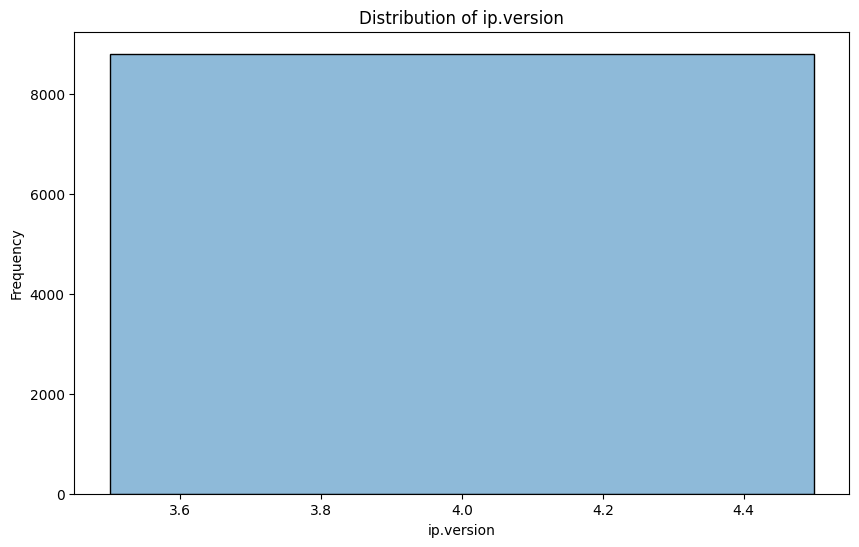

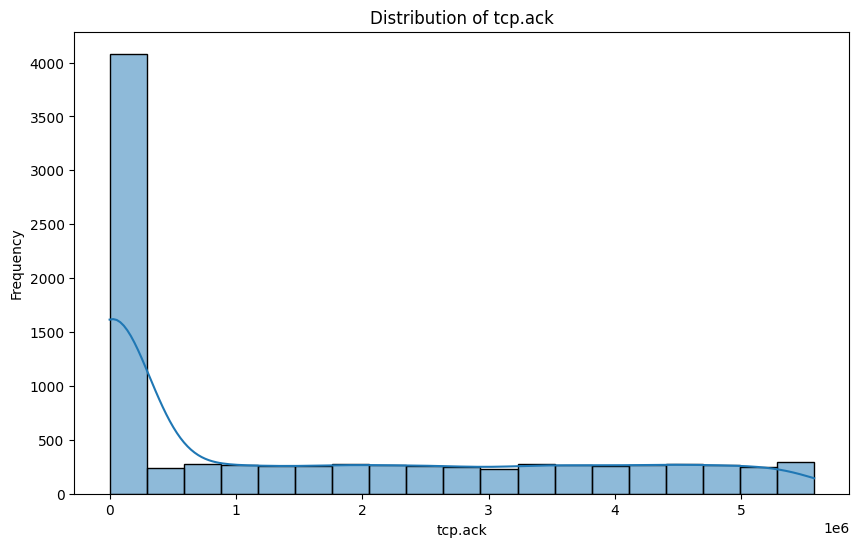

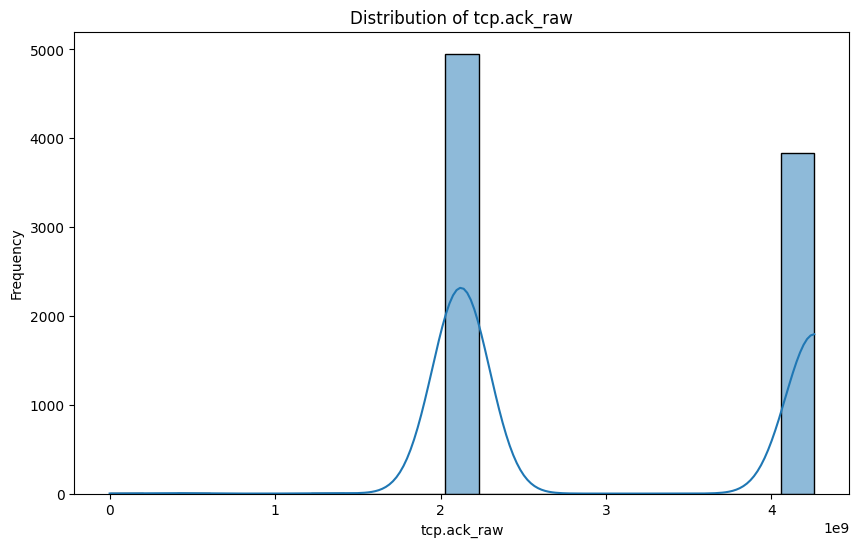

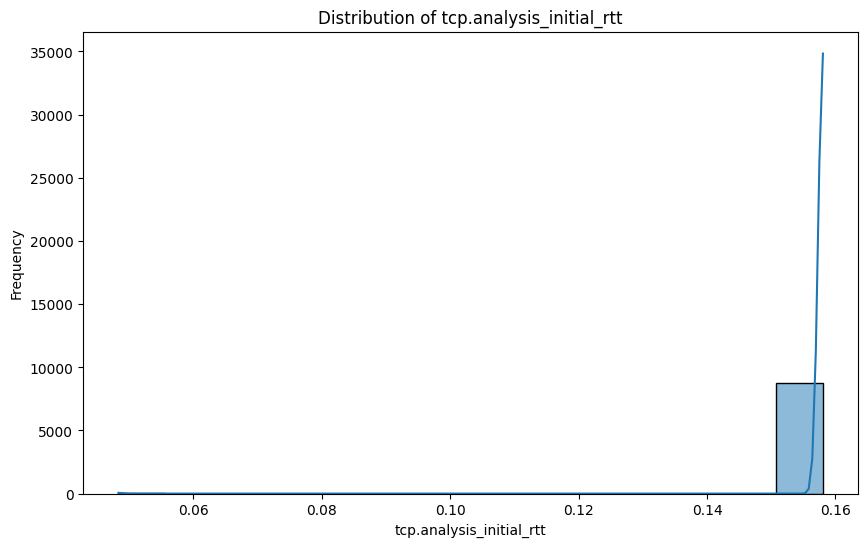

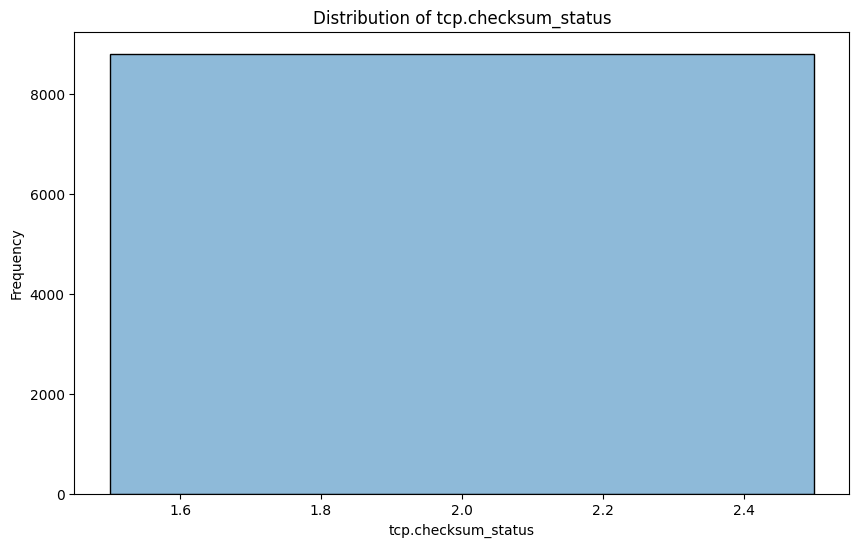

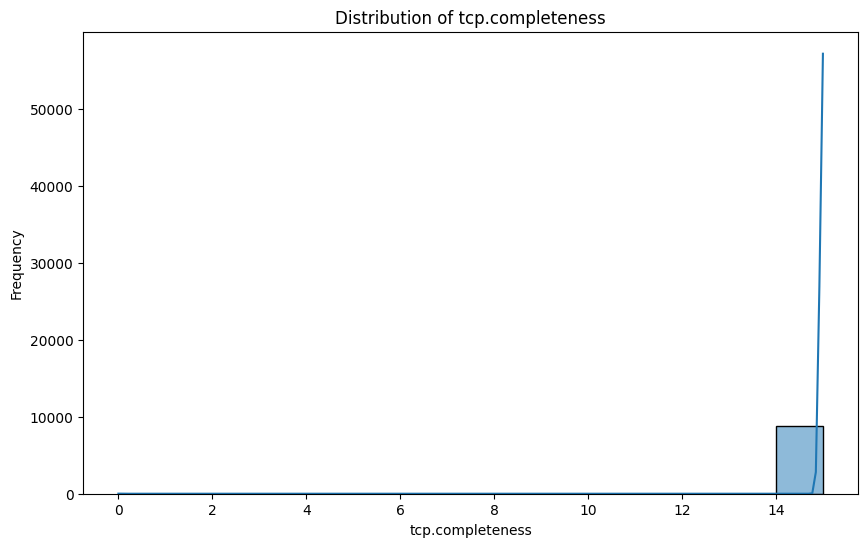

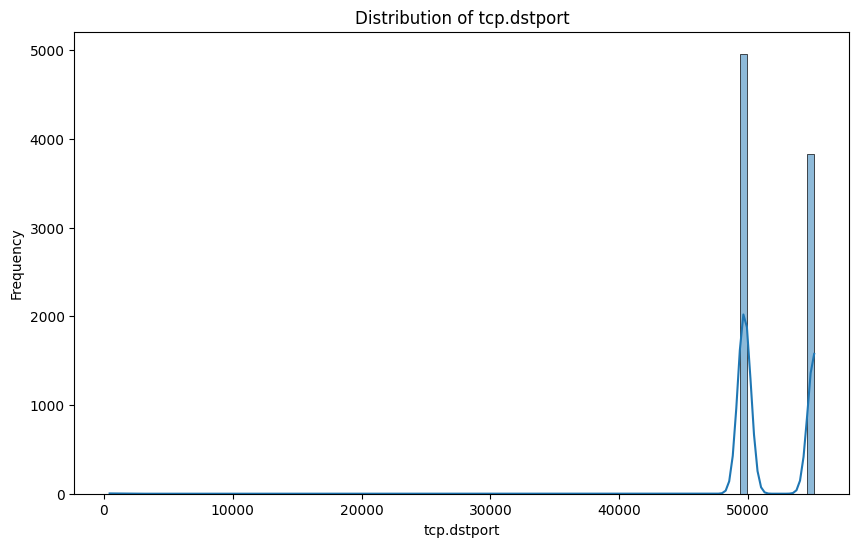

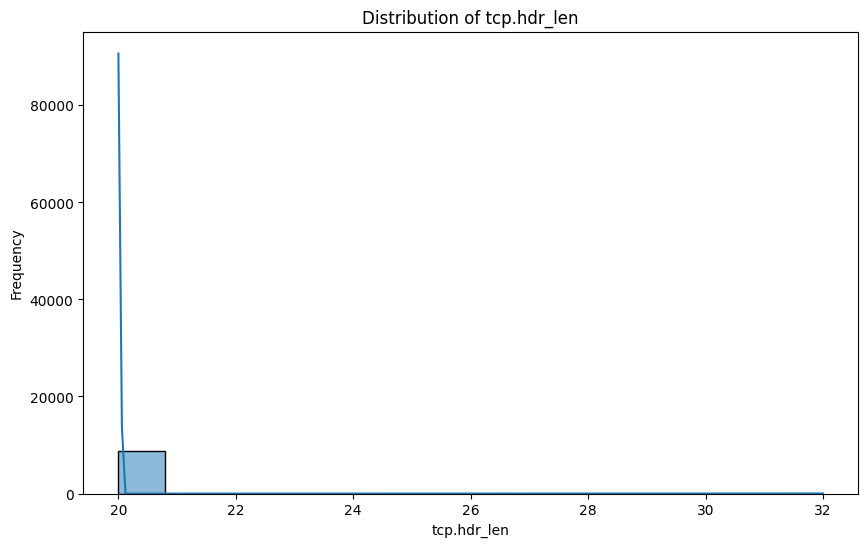

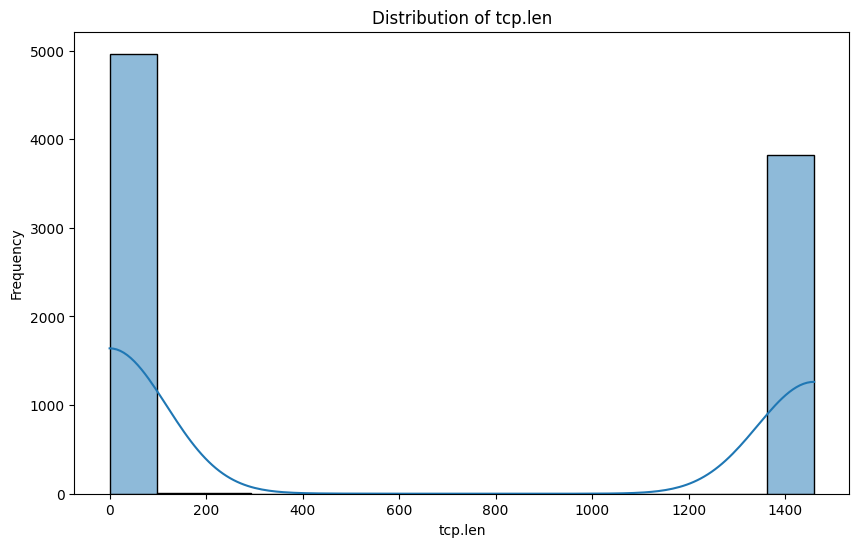

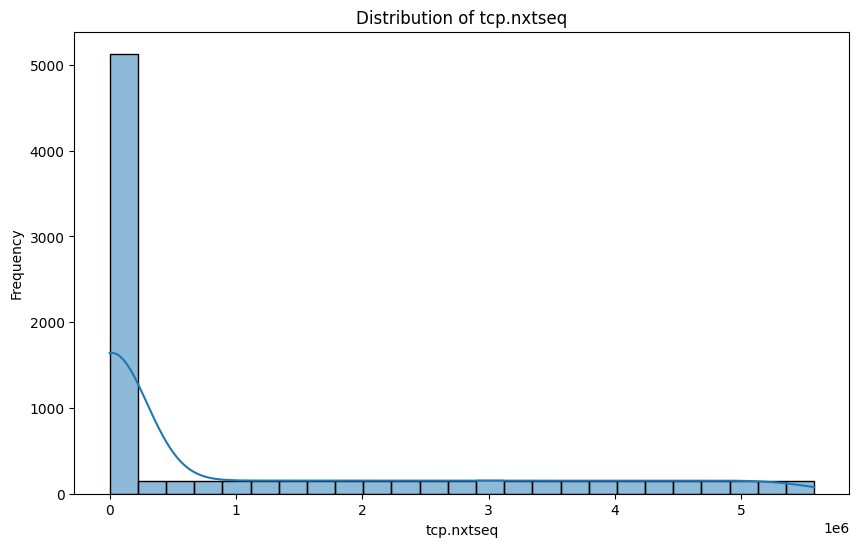

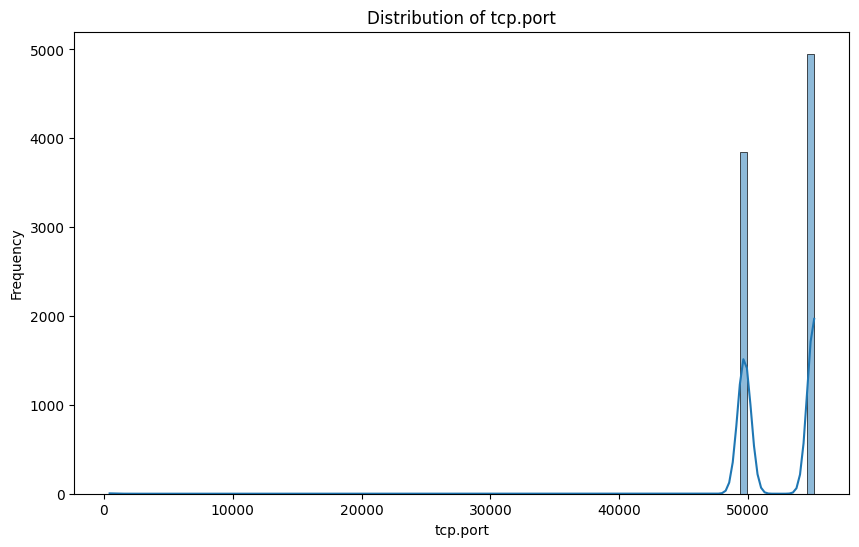

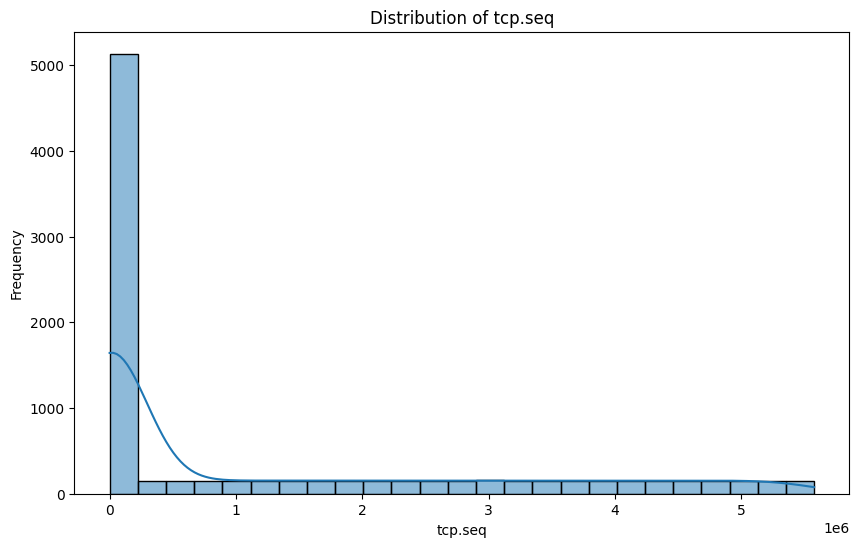

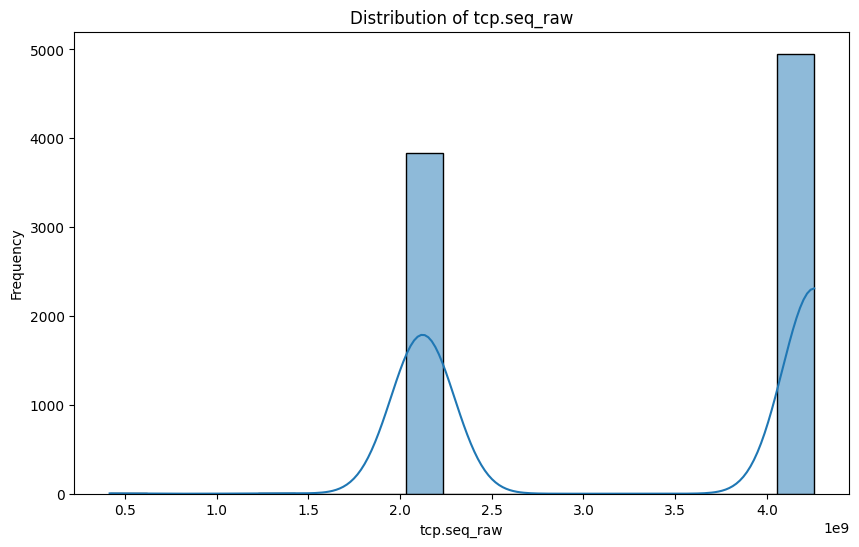

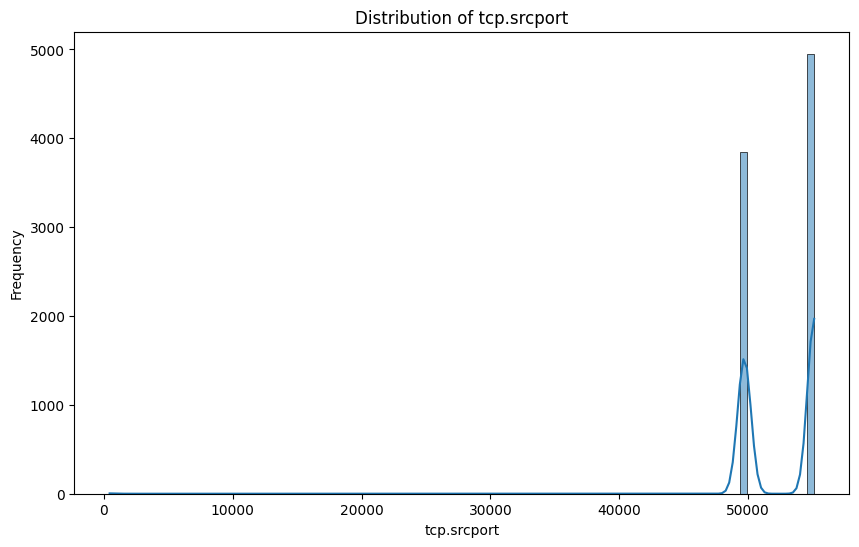

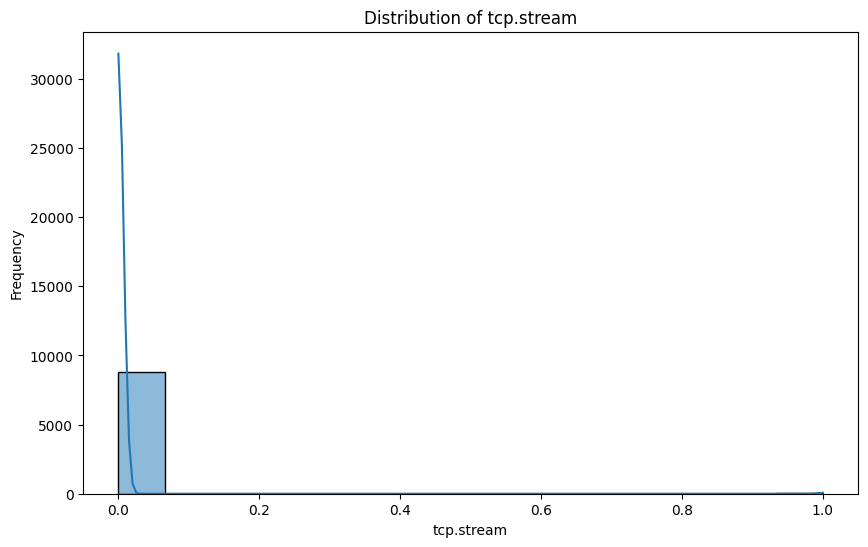

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x71931a71e9c0>>
Traceback (most recent call last):
  File "/home/kirim/Documents/University/PRI/project/.venv/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


KeyboardInterrupt: 

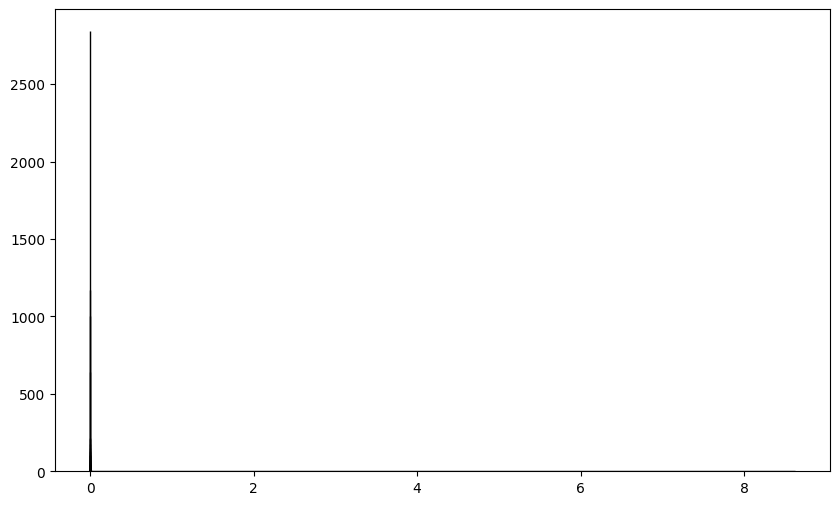

In [17]:
visualization.plot_distribution(base_data)